# Regressão Linear Regularizada e Bias vs Variância

In [1]:
# usado para manipular caminhos de diretório
import os
# pacote usado para realizar operações com matrizes
import numpy as np
# pacote de visualização gráfica
from matplotlib import pyplot as plt
# pacote de otimização (escolha de alguns hiperparâmetros)
from scipy import optimize
# carrega datasets executáveis em matlab
from scipy.io import loadmat
# incorporando plotagem do matplotlib no arquivo 
%matplotlib inline

## Regressão Linear Regularizada

Na primeira metade do exercício, você implementará a regressão linear regularizada para prever a quantidade de água que flui de uma barragem usando a mudança do nível de água em um reservatório. Na próxima metade, você fará alguns diagnósticos de algoritmos de aprendizagem de depuração e examinará os efeitos do viés vs. variância.

### Visualizando o dataset

Começaremos visualizando o conjunto de dados contendo registros históricos sobre a mudança no nível da água, $ x $, e a quantidade de água fluindo para fora da barragem, $ y $. Este conjunto de dados é dividido em três partes:

- Um conjunto de **treinamento** que seu modelo aprenderá em: **X**, **y**; 
- Um conjunto de **validação cruzada** definida para determinar o parâmetro de regularização: **Xval**, **yval**;
- Um conjunto de **teste** definido para avaliar o desempenho. Estes são exemplos que seu modelo não viu durante o treinamento: **Xtest**, **ytest**;



In [2]:
# carregando os dados do arquivo ex5data1.mat, todas as variáveis serão armazenadas em um dicionário
dataset = loadmat(os.path.join('datasets', 'ex5data1.mat'))

In [3]:
# visulizando a organização do dicionário
for keys, values in dataset.items():
    print(keys)

__header__
__version__
__globals__
X
y
Xtest
ytest
Xval
yval


In [4]:
# separando os dados de treinamento, teste e validação do dicionário 
# além disso, os dados foram convertidos para um formato de vetor numpy
X, y = dataset['X'], dataset['y'][:, 0]
Xtest, ytest = dataset['Xtest'], dataset['ytest'][:, 0]
Xval, yval = dataset['Xval'], dataset['yval'][:, 0]

In [5]:
# m = número de exemplos treináveis
m = y.size
print(m)

12


Text(0, 0.5, 'Água fluindo para fora da barragem (y)')

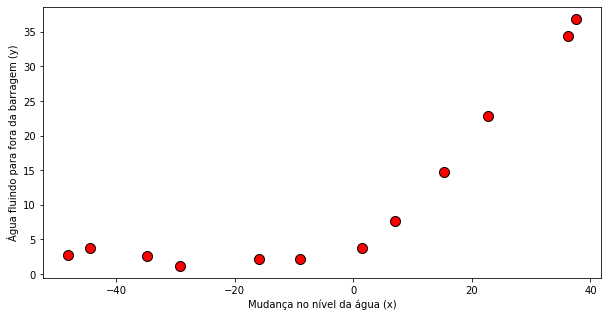

In [6]:
# Visualizando os dados com matplotlib
plt.figure(figsize = (10, 5))
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1) 
plt.xlabel('Mudança no nível da água (x)')
plt.ylabel('Água fluindo para fora da barragem (y)')

### Função de custo de regressão linear regularizada

Lembre-se de que a regressão linear regularizada tem a seguinte função de custo:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

Onde $\lambda$ é um parâmetro de regularização que controla o grau de regularização (assim, ajuda a prevenir overfitting). O termo de regularização impõe uma penalidade ao custo geral J. À medida que as magnitudes dos parâmetros do modelo $\theta_j$ aumentam, a penalidade também aumenta. Observe que você não deve regularizar o termo $\theta_0$.  

### Gradiente de regressão linear regularizado

Correspondentemente, a derivada parcial da função de custo para regressão linear regularizada é definida como:

$$
\begin{align}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} & \qquad \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \qquad \text{for } j \ge 1
\end{align}
$$

In [7]:
def linearRegCostFunction(X, y, teta, lambda_= 0.0):
    """
    Compute cost and gradient for regularized linear regression 
    with multiple variables. Computes the cost of using theta as
    the parameter for linear regression to fit the data points in X and y. 
    
    Parameters
    ----------
    X : array_like
        The dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y : array_like
        The functions values at each datapoint. A vector of
        shape (m, ).
    
    theta : array_like
        The parameters for linear regression. A vector of shape (n+1,).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    J : float
        The computed cost function. 
    
    grad : array_like
        The value of the cost function gradient w.r.t theta. 
        A vector of shape (n+1, ).
    
    Instructions
    ------------
    Compute the cost and gradient of regularized linear regression for
    a particular choice of theta.
    You should set J to the cost and grad to the gradient.
    """

    m = y.size # número de exemplos treináveis

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(teta.shape)

    # ====================== YOUR CODE HERE ======================
    
    # computando a equação da função de custo
    h = X.dot(teta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(teta[1:]))
    
    # computando o valor dos parâmetros através do método de gradiente descendente (via derivadas parciais)
    grad = (1 / m) * (h - y).dot(X)
    grad[1:] = grad[1:] + (lambda_ / m) * teta[1:]

    # ============================================================
    return J, grad

In [8]:
# hstack = concatena por colunas, vstack = concatena por linhas
#np.hstack((np.ones((m, 1)), X))
# axis = 1 concatena por colunas, axis = 0 concatena por linhas
#np.concatenate([np.ones((m, 1)), X], axis=1)

In [9]:
# definindo uma hipótese inicial para os valores dos parâmetros
teta = np.array([1, 1])
# adicionando um bias aos atributos previsores de treinamento
X_bias = np.concatenate([np.ones((m, 1)), X], axis=1)
# computando o valor da função de custo para esses valores 
J, grad = linearRegCostFunction(X_bias, y, teta, 1)

print('Custo dos valores de teta = {}: {}'.format(teta, J))
print('Valores dos parâmetros teta para esse custo: {}'.format(grad))

Custo dos valores de teta = [1 1]: 303.9931922202643
Valores dos parâmetros teta para esse custo: [-15.30301567 598.25074417]


### Realizando o treinamento com a regressão linear

Uma vez que sua função de custo e gradiente estão funcionando corretamente, a próxima célula irá executar o código em `trainLinearReg` para calcular os valores ótimos de $\theta$. Esta função de treinamento usa o módulo de otimização `scipy` para minimizar a função de custo.

Nesta parte, definimos o parâmetro de regularização $\lambda$ como zero. Como nossa implementação atual de regressão linear está tentando ajustar um $\theta$ bidimensional, a regularização não será extremamente útil para um $\theta$ de dimensão tão baixa. Nas partes posteriores do exercício, você usará a regressão polinomial com regularização.

Finalmente, o código na próxima célula também deve traçar a linha de melhor ajuste, que deve ser semelhante à figura abaixo. 

![](imagens/linear_fit.png)

A linha de melhor ajuste nos diz que o modelo não é um bom ajuste para os dados porque os dados têm um padrão não linear. Embora visualizar o melhor ajuste conforme mostrado seja uma maneira possível de depurar seu algoritmo de aprendizado, nem sempre é fácil visualizar os dados e o modelo. Na próxima seção, você implementará uma função para gerar curvas de aprendizado que podem ajudá-lo a depurar seu algoritmo de aprendizado, mesmo que não seja fácil visualizar os dados.

In [10]:
def trainLinearReg(linearRegCostFunction, X, y, lambda_ = 0.0, maxiter = 200):
    """
    Trains linear regression using scipy's optimize.minimize.

    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). The bias term is assumed to be concatenated.

    y : array_like
        Function values at each datapoint. A vector of shape (m,).

    lambda_ : float, optional
        The regularization parameter.

    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.

    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """
    # definindo valores iniciais para teta
    teta_inicial = np.zeros(X.shape[1])

    # criando uma função lambda relativa a função de custo
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    # a função de custo recebe apenas um argumento
    options = {'maxiter': maxiter}

    # minimização da função de custo através do scipy (por meio da modificação dos parâmetros)
    res = optimize.minimize(costFunction, teta_inicial, jac = True, method = 'TNC', options = options)
    return res

In [11]:
# entendendo como uma função lambda pode ser invocada (observe que ela funciona só com a chamada de um argumento ao invés de 4)
lambda_ = 0
costFunction = lambda teta: linearRegCostFunction(X_bias, y, teta, lambda_)
costFunction(np.array([1, 1]))

(303.9515255535976, array([-15.30301567, 598.16741084]))

In [12]:
# obtendo a função de custo e os parâmetros após a otimização
valores_otimizados = trainLinearReg(linearRegCostFunction, X_bias, y, lambda_ = 0)
print('Função de custo após a otimização: {}'.format(valores_otimizados.fun))
print('Valores de teta após a otimização: {}'.format(valores_otimizados.x))

Função de custo após a otimização: 22.373906495108915
Valores de teta após a otimização: [13.08790351  0.36777923]


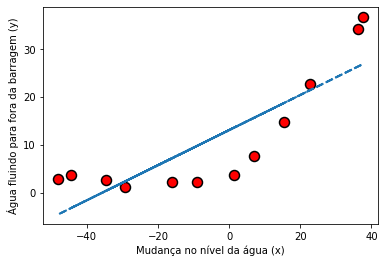

In [13]:
#  Visualizando a reta obtida com o algoritmo de regressão linear
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Mudança no nível da água (x)')
plt.ylabel('Água fluindo para fora da barragem (y)')
plt.plot(X, np.dot(X_bias, valores_otimizados.x), '--', lw=2)

## Bias - Variância

Um conceito importante no aprendizado de máquina é a compensação de bias - variância. Os modelos com um viés (bias) alto não são complexos o suficiente para os dados e tendem a se ajustar mal, enquanto os modelos com alta variância se ajustam excessivamente aos dados de treinamento. 

### Curvas de Aprendizagem

Agora, você implementará o código para gerar as curvas de aprendizado que serão úteis na depuração de algoritmos de aprendizado. Lembre-se de que uma curva de aprendizado traça o treinamento e o erro de validação cruzada como uma função do tamanho do conjunto de treinamento. Seu trabalho é preencher a função **learningCurve** na próxima célula, de modo que ela retorne um vetor de erros para o conjunto de treinamento e conjunto de validação cruzada.

Para traçar a curva de aprendizado, precisamos de um erro de conjunto de treinamento e validação cruzada para diferentes tamanhos de conjunto de treinamento. Para obter tamanhos de conjunto de treinamento diferentes, você deve usar subconjuntos diferentes do conjunto de treinamento original `X`. Especificamente, para um tamanho de conjunto de treinamento de $i$, você deve usar os primeiros $i$ exemplos (i.e., `X[:i, :]`
and `y[:i]`).

Depois de aprender os parâmetros $\theta$, você deve calcular o erro nos conjuntos de treinamento e validação cruzada. Lembre-se de que o erro de treinamento para um conjunto de dados é definido como

$$ J_{\text{train}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

Em particular, observe que o erro de treinamento não inclui o termo de regularização. Uma maneira de calcular o erro de treinamento é usar sua função de custo existente e definir $\lambda$ como 0 apenas ao usá-la para calcular o erro de treinamento e o erro de validação cruzada. Ao calcular o erro do conjunto de treinamento, certifique-se de calculá-lo no subconjunto de treinamento (ou seja, `X [: n,:]` e `y [: n]`) em vez de no conjunto de treinamento inteiro. No entanto, para o erro de validação cruzada, você deve computá-lo em todo o conjunto de validação cruzada. 

In [14]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    """
    Generates the train and cross validation set errors needed to plot a learning curve
    returns the train and cross validation set errors for a learning curve. 
    
    In this function, you will compute the train and test errors for
    dataset sizes from 1 up to m. In practice, when working with larger
    datasets, you might want to do this in larger intervals.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    Xval : array_like
        The validation dataset. Matrix with shape (m_val x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    yval : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    error_train : array_like
        A vector of shape m. error_train[i] contains the training error for
        i examples.
    error_val : array_like
        A vecotr of shape m. error_val[i] contains the validation error for
        i training examples.
    
    Instructions
    ------------
    Fill in this function to return training errors in error_train and the
    cross validation errors in error_val. i.e., error_train[i] and 
    error_val[i] should give you the errors obtained after training on i examples.
    
    Notes
    -----
    - You should evaluate the training error on the first i training
      examples (i.e., X[:i, :] and y[:i]).
    
      For the cross-validation error, you should instead evaluate on
      the _entire_ cross validation set (Xval and yval).
    
    - If you are using your cost function (linearRegCostFunction) to compute
      the training and cross validation error, you should call the function with
      the lambda argument set to 0. Do note that you will still need to use
      lambda when running the training to obtain the theta parameters.
    
    Hint
    ----
    You can loop over the examples with the following:
     
           for i in range(1, m+1):
               # Compute train/cross validation errors using training examples 
               # X[:i, :] and y[:i], storing the result in 
               # error_train[i-1] and error_val[i-1]
               ....  
    """
    # número de exemplos treináveis
    m = y.size

    # criando um array numpy para armazenar os erros de predição associados aos atributos de treinamento e de validação
    erro_treinamento = np.zeros(m)
    erro_validacao   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    
    for i in range(1, m + 1):
        teta_t = trainLinearReg(linearRegCostFunction, X[:i], y[:i], lambda_ = 0)
        erro_treinamento[i - 1], _ = linearRegCostFunction(X[:i], y[:i], teta_t.x, lambda_ = 0)
        erro_validacao[i - 1], _ = linearRegCostFunction(Xval, yval, teta_t.x, lambda_ = 0)
        
    # =============================================================
    return erro_treinamento, erro_validacao

Quando você terminar de implementar a função `learningCurve`, executar a próxima célula imprimirá as curvas de aprendizado e produzirá um gráfico semelhante à figura abaixo.

![](imagens/learning_curve.png)

Na figura da curva de aprendizado, você pode observar que tanto o erro do treinamento quanto o erro de validação cruzada são altos quando o número de exemplos de treinamento é aumentado. Isso reflete um problema de viés (bias) alto no modelo - o modelo de regressão linear é muito simples e não consegue se ajustar bem ao nosso conjunto de dados.

In [15]:
# adicionando um parâmetro bias nos atributos previsores de treinamento e de validação
X_bias = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_bias = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)

# obtendo os valores de erro associados aos dados de treinamento e aos dados de validação
erro_treinamento, erro_validacao = learningCurve(X_bias, y, Xval_bias, yval, lambda_=0)

Text(0, 0.5, 'Erro')

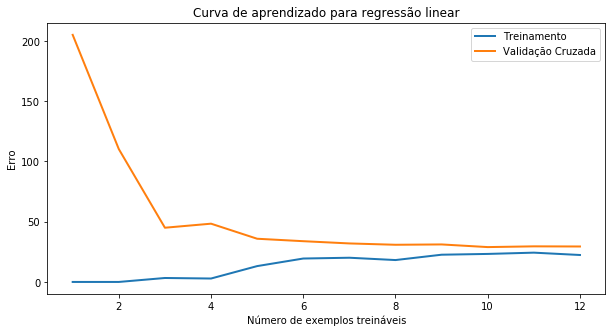

In [16]:
# visulizando o gráfico de erro nas predições com os dados de treinamento e os dados de validação
plt.figure(figsize = (10, 5))
plt.plot(np.arange(1, m+1), erro_treinamento, np.arange(1, m+1), erro_validacao, lw=2)
plt.title('Curva de aprendizado para regressão linear')
plt.legend(['Treinamento', 'Validação Cruzada'])
plt.xlabel('Número de exemplos treináveis')
plt.ylabel('Erro')

In [17]:
print('# Exemplos de Treinamento\tErro de Treinamento\tErro de Validação Cruzada')
for i in range(m):
    print('{}\t\t\t\t{}\t{}'.format(i+1, erro_treinamento[i], erro_validacao[i]))

# Exemplos de Treinamento	Erro de Treinamento	Erro de Validação Cruzada
1				1.0176953929799205e-18	205.1210957127572
2				3.466571458294657e-09	110.30264057845221
3				3.2865950455012833	45.010231320931936
4				2.8426776893998307	48.36891082876348
5				13.154048809114924	35.86516473228544
6				19.443962512495464	33.829961665848444
7				20.098521655088877	31.97098567215687
8				18.172858695200024	30.862446202285934
9				22.609405424954733	31.13599809769148
10				23.261461592611813	28.93620747049214
11				24.31724958804416	29.55143162171058
12				22.373906495108915	29.43381813215488


## Regressão Polinomial Regularizada

O problema com nosso modelo linear é que ele é muito simples para os dados e resultava em subajuste (viés alto). Nesta parte do exercício, você tratará desse problema adicionando mais recursos. Para regressão polinomial, nossa hipótese tem a forma:

$$
\begin{align}
h_\theta(x)  &= \theta_0 + \theta_1 \times (\text{nivelAgua}) + \theta_2 \times (\text{nivelAgua})^2 + \cdots + \theta_p \times (\text{nivelAgua})^p \\
& = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p
\end{align}
$$

Observe que ao definir $x_1 = (\text{nivelAgua})$, $x_2 = (\text{nivelAgua})^2$ , $\cdots$, $x_p =
(\text{nivelAgua})^p$, obtemos um modelo de regressão linear onde os recursos são as várias potências do valor original (nivelAgua).

Agora, você adicionará mais recursos usando as potências mais altas do recurso existente $x$ no conjunto de dados. Sua tarefa nesta parte é completar o código na função `polyFeatures` na próxima célula. A função deve mapear o conjunto de treinamento original $X$ de tamanho $m \times 1$ em suas potências superiores. Especificamente, quando um conjunto de treinamento $X$ de tamanho $m \times 1$ é passado para a função, a função deve retornar uma matriz $m \times p$ `X_poli`, onde a coluna 1 contém os valores originais de X, coluna 2 contém os valores de $X^2$, a coluna 3 contém os valores de $ X^3$ e assim sucessivamente.

In [18]:
def polyFeatures(X, p):
    """
    Maps X (1D vector) into the p-th power.
    
    Parameters
    ----------
    X : array_like
        A data vector of size m, where m is the number of examples.
    
    p : int
        The polynomial power to map the features. 
    
    Returns 
    -------
    X_poly : array_like
        A matrix of shape (m x p) where p is the polynomial 
        power and m is the number of examples. That is:
    
        X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p]
    
    Instructions
    ------------
    Given a vector X, return a matrix X_poly where the p-th column of
    X contains the values of X to the p-th power.
    """
    # iniciar um array numpy para armazenar os valores das potências obtidas
    X_polinomios = np.zeros((X.shape[0], p))

    # ====================== YOUR CODE HERE ======================
    
    # iteração para obter as potências relativas em cada execução
    for i in range(p):
        X_polinomios[:, i] = X[:, 0] ** (i + 1)

    # ============================================================
    return X_polinomios

Agora você tem uma função que mapeará os recursos para uma dimensão superior. A próxima célula o aplicará ao conjunto de treinamento, ao conjunto de teste e ao conjunto de validação cruzada.

In [19]:
def featureNormalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each
    feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.

    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of examples,
        and n is the number of dimensions for each example.

    Returns
    -------
    X_norm : array_like
        The normalized input dataset.

    mu : array_like
        A vector of size n corresponding to the mean for each dimension across all examples.

    sigma : array_like
        A vector of size n corresponding to the standard deviations for each dimension across
        all examples.
    """
    
    # obtendo a médio dos dados
    mu = np.mean(X, axis = 0)
    X_norm = (X - mu)
        
    # obtendo o desvio padrão dos dados
    sigma = np.std(X_norm, axis = 0, ddof = 1)
    
    # aplicando a distribuição normal (ou distribuição gaussiana)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [20]:
# definindo polinômios até grau 8
p = 8

# realizar o mapeamento nos atributos previsores de treinamento
X_polinomial = polyFeatures(X, p)
X_polinomial, mu, sigma = featureNormalize(X_polinomial)
X_polinomial = np.concatenate([np.ones((m, 1)), X_polinomial], axis=1)

# Realizar o mapeamento e aplicar a normalização (usando mu e sigma)
X_polinomial_teste = polyFeatures(Xtest, p)
X_polinomial_teste -= mu
X_polinomial_teste /= sigma
# adicionando um parâmetro de viés
X_polinomial_teste = np.concatenate([np.ones((ytest.size, 1)), X_polinomial_teste], axis=1)

# Realizar o mapeamento e aplicar a normalização (usando mu e sigma)
X_polinomial_validacao = polyFeatures(Xval, p)
X_polinomial_validacao -= mu
X_polinomial_validacao /= sigma
# adicionando um parâmetro de viés
X_polinomial_validacao = np.concatenate([np.ones((yval.size, 1)), X_polinomial_validacao], axis=1)

print('Exemplos de treinamento normalizados: ')
X_polinomial[0, :]

Exemplos de treinamento normalizados: 


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

Depois de concluir a função `polyFeatures`, continuaremos a treinar a regressão polinomial usando sua função de custo de regressão linear.

Lembre-se de que, embora tenhamos termos polinomiais em nosso vetor de recursos, ainda estamos resolvendo um problema de otimização de regressão linear. Os termos polinomiais simplesmente se transformaram em recursos que podemos usar para regressão linear. Estamos usando a mesma função de custo e gradiente que você escreveu para a parte anterior deste exercício.

Para esta parte do exercício, você usará um polinômio de grau 8. Acontece que se executarmos o treinamento diretamente nos dados projetados, não funcionará bem, pois os recursos seriam mal dimensionados (por exemplo, um exemplo com $ x = 40 $ agora terá um recurso de $x_8 = 40^8 = 6.5 \times 10^{12}$). Portanto, você vai precisa usar a normalização.

Antes de aprender os parâmetros $\theta$ para a regressão polinomial, primeiro chamamos `featureNormalize` e normalizamos os recursos do conjunto de treinamento, armazenando os parâmetros mu, sigma separadamente.

Depois de aprender os parâmetros $\theta$, você deve ver dois gráficos gerados para regressão polinomial com $\lambda = 0 $, que devem ser semelhantes aos aqui:

<table>
    <tr>
        <td><img src="imagens/polynomial_regression.png"></td>
        <td><img src="imagens/polynomial_learning_curve.png"></td>
    </tr>
</table>

Você deve ver que o ajuste polinomial é capaz de acompanhar muito bem os pontos de dados, obtendo assim um erro de treinamento baixo. A figura à direita mostra que o erro de treinamento permanece essencialmente zero para todos os números de amostras de treinamento. No entanto, o ajuste polinomial é muito complexo e até mesmo cai nos extremos. Este é um indicador de que o modelo de regressão polinomial está super ajustando os dados de treinamento e não generalizará bem.

Para entender melhor os problemas com o modelo não regularizado ($\lambda = 0$), você pode ver que a curva de aprendizado mostra o mesmo efeito onde o erro de treinamento é baixo, mas o erro de validação cruzada é alto. Há uma lacuna entre os erros de treinamento e de validação cruzada, indicando um problema de alta variância.

In [21]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, teta, p):
    """
    Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    Plots the learned polynomial fit with power p and feature normalization (mu, sigma).

    Parameters
    ----------
    polyFeatures : func
        A function which generators polynomial features from a single feature.

    min_x : float
        The minimum value for the feature.

    max_x : float
        The maximum value for the feature.

    mu : float
        The mean feature value over the training dataset.

    sigma : float
        The feature standard deviation of the training dataset.

    theta : array_like
        The parameters for the trained polynomial linear regression.

    p : int
        The polynomial order.
    """
    # traçamos um intervalo ligeiramente maior do que os valores mínimo e máximo para obter
    # uma ideia de como o ajuste irá variar fora do intervalo dos pontos de dados
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # realizando um mapeamento nos valores de X_polinomio
    X_polinomio = polyFeatures(x, p)
    X_polinomio -= mu
    X_polinomio /= sigma

    # adicionando o parâmetro de viés
    X_polinomio = np.concatenate([np.ones((x.shape[0], 1)), X_polinomio], axis=1)

    # plotando o gráfico da curva 
    plt.plot(x, np.dot(X_polinomio, teta), '--', lw=2)
    
    return None

(-20, 50)

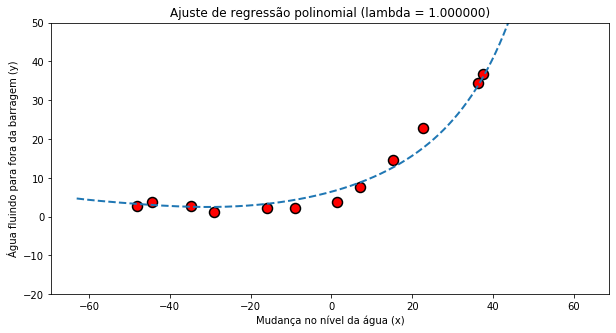

In [22]:
lambda_ = 1
# obtendo os valores de teta otimizador
teta = trainLinearReg(linearRegCostFunction, X_polinomial, y, lambda_=lambda_, maxiter = 55)

# plotandos os dados e realizando treinamento para obter a curva polinomial
plt.figure(figsize = (10, 5))
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')
plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, teta.x, p)

plt.xlabel('Mudança no nível da água (x)')
plt.ylabel('Água fluindo para fora da barragem (y)')
plt.title('Ajuste de regressão polinomial (lambda =% f)' % lambda_)
plt.ylim([-20, 50])

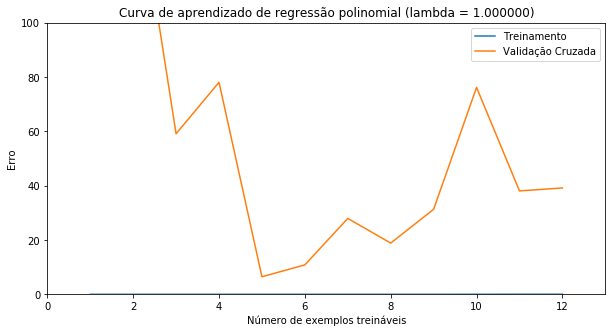

In [23]:
plt.figure(figsize = (10, 5))
# obtendo os erros de predição para os dados de treinamento e dados de validação
erro_treinamento, erro_validacao = learningCurve(X_polinomial, y, X_polinomial_validacao, yval, lambda_)
plt.plot(np.arange(1, 1+m), erro_treinamento, np.arange(1, 1+m), erro_validacao)

plt.title('Curva de aprendizado de regressão polinomial (lambda =% f)' % lambda_)
plt.xlabel('Número de exemplos treináveis')
plt.ylabel('Erro')
plt.axis([0, 13, 0, 100])
plt.legend(['Treinamento', 'Validação Cruzada'])

In [24]:
# visualizando os erros associados aos dados de treinamento e aos dados de validação
print('Regressão polinomial (lambda =% f) \n' % lambda_)
print('# Exemplos de Treinamento\tErro de Treinamento\tErro de Validação Cruzada')
for i in range(m):
    print('{}\t\t\t\t{}\t{}'.format(i+1, erro_treinamento[i], erro_validacao[i]))

Regressão polinomial (lambda = 1.000000) 

# Exemplos de Treinamento	Erro de Treinamento	Erro de Validação Cruzada
1				3.859500834000432e-18	160.72189969292504
2				1.1930763209757199e-15	160.12151057471988
3				2.071029708106108e-15	59.07163515099596
4				2.529302939607181e-14	77.99800443468749
5				2.619151881368912e-13	6.44903267892577
6				1.199041652627713e-09	10.829904725223551
7				1.1477531309141007e-08	27.917627576373725
8				0.0014422436133806741	18.841672110191364
9				0.00018516106251086653	31.270978495497804
10				0.014306064406882769	76.11884337225582
11				0.032763615207474964	38.04180051121988
12				0.030050528636162192	39.119109734143265


Uma maneira de combater o problema de overfitting (alta variância) é adicionar regularização ao modelo. Na próxima seção, você experimentará diferentes parâmetros $\lambda$ para ver como a regularização pode levar a um modelo melhor.

### Ajustando o hiperparâmetro de regularização

Nesta seção, você verá como o parâmetro de regularização afeta a variação de polarização da regressão polinomial regularizada. Agora você deve modificar o parâmetro lambda e tentar $\lambda = 1, 100$. Para cada um desses valores, o script deve gerar um ajuste polinomial aos dados e também uma curva de aprendizado.

Para $\lambda = 1$, os gráficos gerados devem ser semelhantes à figura abaixo. Você deve ver um ajuste polinomial que segue bem a tendência dos dados (à esquerda) e uma curva de aprendizado (à direita) mostrando que a validação cruzada e o erro de treinamento convergem para um valor relativamente baixo. Isso mostra que o modelo de regressão polinomial regularizado $\lambda = 1$ não tem problemas de viés alto ou alta variância. Na verdade, ele consegue um bom equilíbrio entre o viés e a variância.

<table>
    <tr>
        <td><img src="imagens/polynomial_regression_reg_1.png"></td>
        <td><img src="imagens/polynomial_learning_curve_reg_1.png"></td>
    </tr>
</table>

Para $\lambda = 100$, você deve ver um ajuste polinomial (figura abaixo) que não segue bem os dados. Nesse caso, há muita regularização e o modelo não consegue ajustar os dados de treinamento.

![](imagens/polynomial_regression_reg_100.png)

### Selecionando $\lambda$ usando validação cruzada

Nas partes anteriores do exercício, você observou que o valor de $\lambda$ pode afetar significativamente os resultados da regressão polinomial regularizada no conjunto de treinamento e validação cruzada. Em particular, um modelo sem regularização ($\lambda = 0$) se ajusta bem ao conjunto de treinamento, mas não generaliza. Por outro lado, um modelo com muita regularização ($\lambda = 100$) não se ajusta bem ao conjunto de treinamento e teste. Uma boa escolha de $\lambda$ (por exemplo, $\lambda = 1$) pode fornecer um bom ajuste aos dados.

Nesta seção, você implementará um método automatizado para selecionar o parâmetro $\lambda$. Concretamente, você usará um conjunto de validação cruzada para avaliar a qualidade de cada valor de $\lambda$. Depois de selecionar o melhor valor $\lambda$ usando o conjunto de validação cruzada, podemos avaliar o modelo no conjunto de teste para estimar o quão bem o modelo terá um desempenho em dados reais não vistos.

Sua tarefa é completar o código na função `validationCurve`. Especificamente, você deve usar a função `trainLinearReg` para treinar o modelo usando diferentes valores de $\lambda$ e calcular o erro de treinamento e o erro de validação cruzada. Você deve tentar $\lambda$ no seguinte intervalo: {0, 0,001, 0,003, 0,01, 0,03, 0,1, 0,3, 1, 3, 10}.

In [25]:
def validationCurve(X, y, Xval, yval):
    """
    Generate the train and validation errors needed to plot a validation
    curve that we can use to select lambda_.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n) where m is the 
        total number of training examples, and n is the number of features 
        including any polynomial features.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    Xval : array_like
        The validation dataset. Matrix with shape (m_val x n) where m is the 
        total number of validation examples, and n is the number of features 
        including any polynomial features.
    
    yval : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
    
    Returns
    -------
    lambda_vec : list
        The values of the regularization parameters which were used in 
        cross validation.
    
    error_train : list
        The training error computed at each value for the regularization
        parameter.
    
    error_val : list
        The validation error computed at each value for the regularization
        parameter.
    
    Instructions
    ------------
    Fill in this function to return training errors in `error_train` and
    the validation errors in `error_val`. The vector `lambda_vec` contains
    the different lambda parameters to use for each calculation of the
    errors, i.e, `error_train[i]`, and `error_val[i]` should give you the
    errors obtained after training with `lambda_ = lambda_vec[i]`.

    Note
    ----
    You can loop over lambda_vec with the following:
    
          for i in range(len(lambda_vec))
              lambda = lambda_vec[i]
              # Compute train / val errors when training linear 
              # regression with regularization parameter lambda_
              # You should store the result in error_train[i]
              # and error_val[i]
              ....
    """
    # selecionando valores de análise para o hiperparâmetro lambda 
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # computando o erro na predição dos dados de treinamento e dados de validação
    erro_treinamento = np.zeros(len(lambda_vec))
    erro_validacao = np.zeros(len(lambda_vec))

    # ====================== YOUR CODE HERE ======================

    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        teta_t = trainLinearReg(linearRegCostFunction, X, y, lambda_ = lambda_try)
        erro_treinamento[i], _ = linearRegCostFunction(X, y, teta_t.x, lambda_ = 0)
        erro_validacao[i], _ = linearRegCostFunction(Xval, yval, teta_t.x, lambda_ = 0)

    # ============================================================
    return lambda_vec, erro_treinamento, erro_validacao

Depois de concluir o código, a próxima célula executará sua função e traçará uma curva de validação cruzada de erro vs. $\lambda$ que permite que você selecione qual parâmetro $\lambda$ usar. Você deve ver um gráfico semelhante à figura abaixo. 

![](imagens/cross_validation.png)

Nesta figura, podemos ver que o melhor valor de $\lambda$ está em torno de 3. Devido à aleatoriedade nas divisões de treinamento e validação do conjunto de dados, o erro de validação cruzada pode às vezes ser menor do que o erro de treinamento.

Text(0, 0.5, 'Erro')

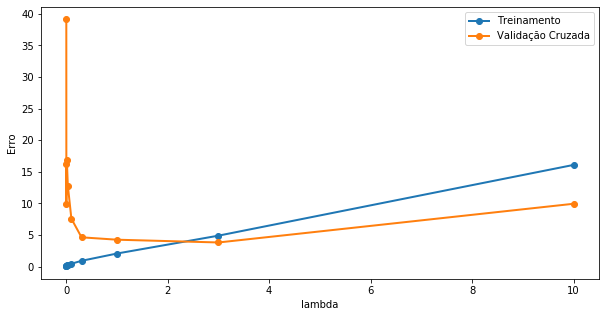

In [26]:
lambda_vec, erro_treinamento, erro_validacao = validationCurve(X_polinomial, y, X_polinomial_validacao, yval)

plt.figure(figsize = (10, 5))
plt.plot(lambda_vec, erro_treinamento, '-o', lambda_vec, erro_validacao, '-o', lw = 2)
plt.legend(['Treinamento', 'Validação Cruzada'])
plt.xlabel('lambda')
plt.ylabel('Erro')

In [27]:
print('lambda\t\tErro de Treinamento\tErro de Validação')
for i in range(len(lambda_vec)):
    print('{}\t\t{}\t{}'.format(lambda_vec[i], erro_treinamento[i], erro_validacao[i]))

lambda		Erro de Treinamento	Erro de Validação
0		0.030050528636162192	39.119109734143265
0.001		0.11274587795818126	9.844088638063784
0.003		0.1710418958031822	16.277693853361665
0.01		0.22147683088770645	16.912547865800423
0.03		0.2818279277763506	12.829495305555342
0.1		0.4593280639738924	7.586642390152084
0.3		0.9217613979717447	4.636819997428417
1		2.076199483729708	4.26060177469673
3		4.901371970848054	3.822928671071926
10		16.092272700585347	9.945554220768376
